In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

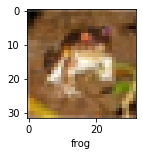

In [10]:
plot_sample(X_train, y_train, 0)


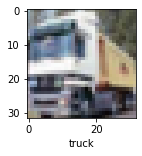

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.9365 - accuracy: 0.2998
Epoch 2/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.6433 - accuracy: 0.4203
Epoch 3/5
1563/1563 [==============================] - 65s 41ms/step - loss: 1.5600 - accuracy: 0.4514
Epoch 4/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4918 - accuracy: 0.4754
Epoch 5/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4400 - accuracy: 0.4907


In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.46      0.52      1000
           1       0.59      0.64      0.61      1000
           2       0.26      0.61      0.36      1000
           3       0.44      0.23      0.30      1000
           4       0.58      0.20      0.30      1000
           5       0.51      0.24      0.33      1000
           6       0.43      0.68      0.53      1000
           7       0.59      0.50      0.54      1000
           8       0.65      0.59      0.62      1000
           9       0.54      0.61      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.52      0.48      0.47     10000
weighted avg       0.52      0.48      0.47     10000



In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.7239 - accuracy: 0.3689
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1739 - accuracy: 0.5876
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0253 - accuracy: 0.6437
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9287 - accuracy: 0.6793
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8641 - accuracy: 0.7005
Epoch 6/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.8131 - accuracy: 0.7182
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7682 - accuracy: 0.7329
Epoch 8/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7147 - accuracy: 0.7510
Epoch 9/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6809 - accuracy: 0.7623
Epoch 10/10
1563/1563 [==============================] - 25s 16m

In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9558 - accuracy: 0.6871


[0.9558276534080505, 0.6870999932289124]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.8489886e-03, 4.6330498e-04, 2.7636134e-03, 7.8196675e-01,
        3.1877810e-03, 1.8187843e-01, 6.6241538e-03, 1.2982222e-04,
        1.0035324e-02, 1.0101731e-02],
       [9.5944456e-04, 4.4765469e-01, 7.1606606e-05, 1.3133042e-06,
        5.6473073e-06, 6.6268558e-07, 1.9223985e-06, 3.4145049e-08,
        5.4817313e-01, 3.1316432e-03],
       [1.0610038e-02, 6.1992782e-01, 1.6336122e-03, 1.8960837e-03,
        7.9106999e-04, 3.4894943e-04, 7.4756780e-04, 1.0191593e-03,
        1.4901826e-01, 2.1400739e-01],
       [7.2470456e-01, 6.8719700e-02, 3.6114689e-02, 8.5056119e-05,
        3.2115431e-04, 3.6881424e-06, 2.9404842e-05, 5.5578716e-06,
        1.6998439e-01, 3.1885495e-05],
       [4.6264532e-07, 3.5974392e-06, 1.5625923e-03, 3.0125559e-03,
        4.8982641e-03, 1.6861084e-04, 9.9034190e-01, 1.4111703e-07,
        1.0848768e-05, 1.1071728e-06]], dtype=float32)

In [ ]:

y_test[:5]